<a href="https://colab.research.google.com/github/YounSooKimTech/CDDS_2023/blob/main/Analysis_Station.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [8]:
from google.colab import drive
drive.mount('/content/drive')
!ls /content/drive/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
MyDrive  Othercomputers  Shareddrives


In [9]:
import pandas as pd
import folium
import urllib3

# Load your dataset
df = pd.read_csv("/content/drive/MyDrive/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")

In [10]:
df.head(2)

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid
0,08/04/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-08-04T04:00:00H0071 Av (L)MLomny
1,02/13/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-02-13T03:00:00H0071 Av (L)MLomny


In [11]:
import pandas as pd

# Assuming you have a DataFrame with a column named 'datetime_column' containing datetime strings

# Convert the column to pandas datetime format
df['datetime_column'] = pd.to_datetime(df['transit_timestamp'], format='%m/%d/%Y %I:%M:%S %p')

# Extract the weekday (0 = Monday, 1 = Tuesday, ..., 6 = Sunday)
df['weekday'] = df['datetime_column'].dt.weekday

# Extract the date in yyyy-mm-dd format
df['date'] = df['datetime_column'].dt.strftime('%Y-%m-%d')

# Extract the hour in 24-hour format
df['hour'] = df['datetime_column'].dt.strftime('%H')

df

,transit_timestamp,station_complex_id,station_complex,borough,routes,payment_method,ridership,transfers,latitude,longitude,Georeference,itsuid,datetime_column,weekday,date,hour
0,08/04/2022 04:00:00 AM,H007,1 Av (L),M,L,omny,11,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2022-08-04T04:00:00H0071 Av (L)MLomny,2022-08-04 04:00:00,3,2022-08-04,04
1,02/13/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-02-13T03:00:00H0071 Av (L)MLomny,2023-02-13 03:00:00,0,2023-02-13,03
2,03/08/2023 04:00:00 AM,H007,1 Av (L),M,L,omny,4,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-08T04:00:00H0071 Av (L)MLomny,2023-03-08 04:00:00,2,2023-03-08,04
3,03/23/2023 03:00:00 AM,H007,1 Av (L),M,L,omny,10,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-03-23T03:00:00H0071 Av (L)MLomny,2023-03-23 03:00:00,3,2023-03-23,03
4,04/03/2023 05:00:00 AM,H007,1 Av (L),M,L,omny,28,0,40.730953,-73.981628,POINT (-73.98162841796875 40.730953216552734),2023-04-03T05:00:00H0071 Av (L)MLomny,2023-04-03 05:00:00,0,2023-04-03,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11763900,01/17/2023 02:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,54,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-01-17T14:00:00R419Zerega Av (6)BX6metrocard,2023-01-17 14:00:00,1,2023-01-17,14
11763901,09/05/2023 01:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,104,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-09-05T13:00:00R419Zerega Av (6)BX6metrocard,2023-09-05 13:00:00,1,2023-09-05,13
11763902,01/15/2023 07:00:00 PM,R419,Zerega Av (6),BX,6,metrocard,6,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2023-01-15T19:00:00R419Zerega Av (6)BX6metrocard,2023-01-15 19:00:00,6,2023-01-15,19
11763903,10/01/2022 07:00:00 AM,R419,Zerega Av (6),BX,6,omny,18,0,40.836487,-73.847038,POINT (-73.84703826904297 40.83648681640625),2022-10-01T07:00:00R419Zerega Av (6)BX6omny,2022-10-01 07:00:00,5,2022-10-01,07


In [12]:
# df.to_csv("time_processed.csv")

# After PreProcessing

In [1]:
import pandas as pd

df = pd.read_csv("/content/time_processed.csv")

<ipython-input-1-e491ee3d89cf>:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/time_processed.csv")


In [ ]:
df.columns

In [2]:
import folium
import pandas as pd

# Initialize a Folium map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Create a HeatMap layer based on the number of riders
heat_data = [[row['latitude'], row['longitude'], row['ridership']] for index, row in df.iterrows()]
folium.plugins.HeatMap(heat_data).add_to(m)

for index, row in df.iterrows():
    folium.Marker([row['latitude'], row['longitude']], tooltip=row['station_name']).add_to(m)

m

AttributeError: ignored

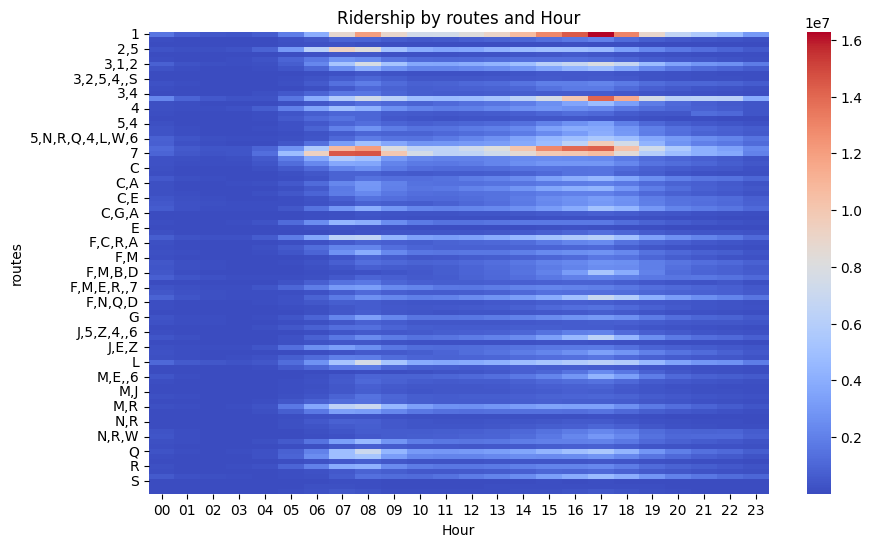

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

temp = df.dropna(subset = ["routes"]).sort_values(by="routes")
pivot_table = temp.pivot_table(index='routes', columns='hour', values='ridership', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', fmt='g')

# Set plot title and labels
plt.title('Ridership by routes and Hour')
plt.xlabel('Hour')

# Show the plot
plt.show()

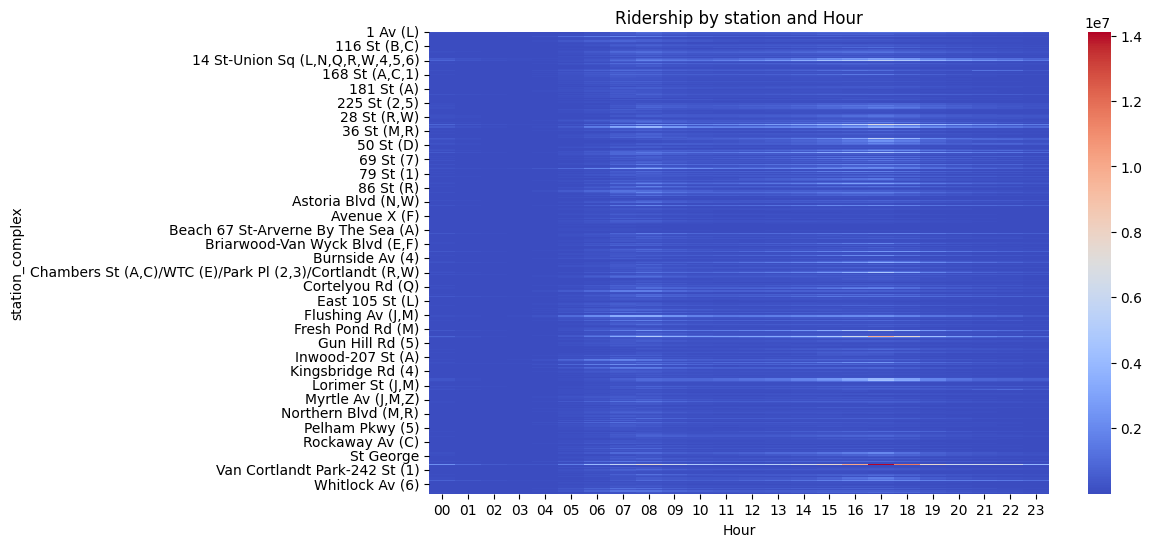

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

pivot_table = df.pivot_table(index='station_complex', columns='hour', values='ridership', aggfunc='sum')

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=False, cmap='coolwarm', fmt='g')

# Set plot title and labels
plt.title('Ridership by station and Hour')
plt.xlabel('Hour')

# Show the plot
plt.show()